In [222]:
from importlib import reload
from matplotlib import pyplot as plt
import numpy as np
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure, draw_graph_with_node_highlighted, draw_graph_after_failure_with_attacked_nodes
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack, high_load_node_attack

In [223]:
G = load_data_with_attributes()

Graph loaded: 4941 nodes, 6594 edges


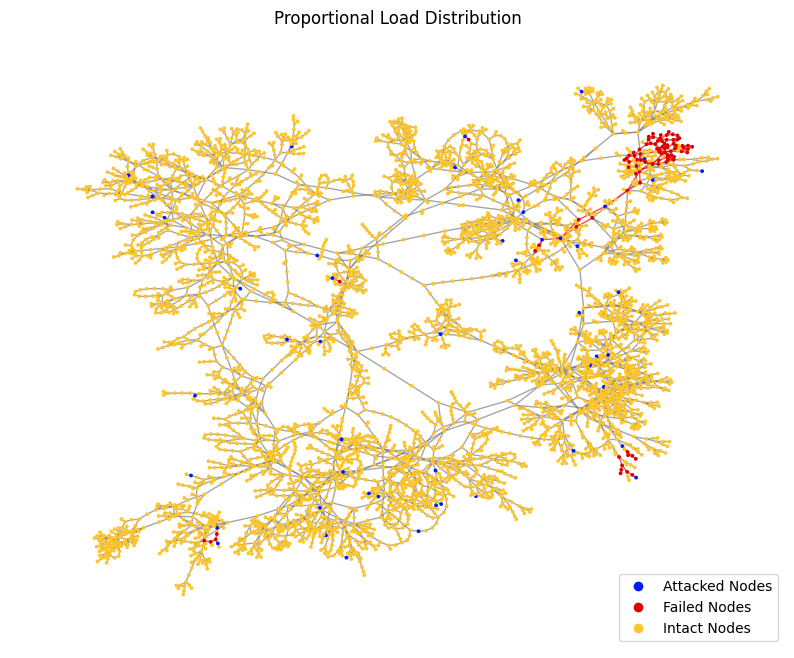

Number of cascade steps: 17
Failed nodes per step: [8, 8, 8, 7, 4, 4, 3, 4, 6, 5, 7, 4, 3, 7, 12, 6, 0]
Final outputs: {'num_failed_nodes': 139, 'num_intact_nodes': 4802, 'size_largest_cc': 4640}
Attacked nodes: [1769, 1828, 1067, 254, 3592, 4568, 3557, 1134, 2942, 4206, 22, 4170, 2374, 357, 907, 3402, 2046, 178, 1887, 592, 2058, 2237, 2167, 4796, 523, 3091, 4164, 3818, 3971, 2470, 2671, 3771, 3751, 408, 1573, 4933, 2944, 1942, 2712, 2397, 4163, 2440, 4427, 2749, 1820, 1631, 2633, 3222, 161, 4612]


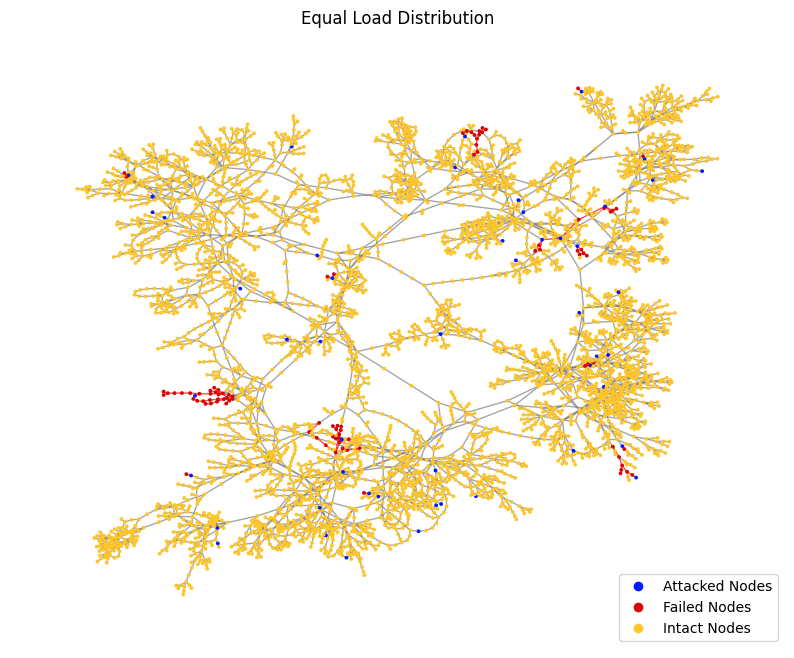

Number of cascade steps: 17
Failed nodes per step: [22, 10, 8, 10, 11, 6, 4, 3, 6, 5, 3, 1, 1, 1, 1, 2, 0]
Final outputs: {'num_failed_nodes': 143, 'num_intact_nodes': 4798, 'size_largest_cc': 4751}
Attacked nodes: [1769, 1828, 1067, 254, 3592, 4568, 3557, 1134, 2942, 4206, 22, 4170, 2374, 357, 907, 3402, 2046, 178, 1887, 592, 2058, 2237, 2167, 4796, 523, 3091, 4164, 3818, 3971, 2470, 2671, 3771, 3751, 408, 1573, 4933, 2944, 1942, 2712, 2397, 4163, 2440, 4427, 2749, 1820, 1631, 2633, 3222, 161, 4612]
Graph loaded: 4941 nodes, 6594 edges


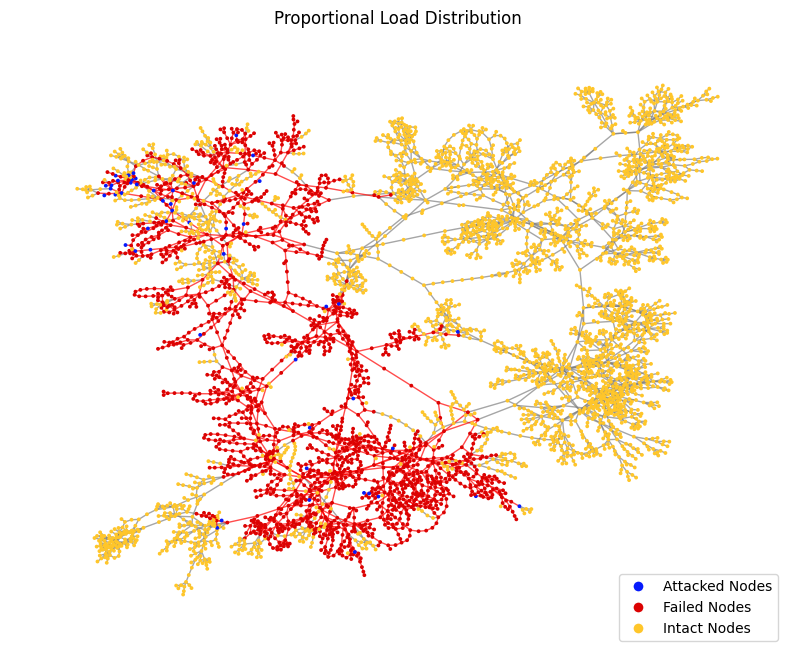

Total failed nodes after sequential attacks: 1823
Attacked nodes: [1769, 1828, 2006, 1067, 254, 3592, 3468, 3415, 3574, 3639, 3304, 3315, 3355, 3625, 3398, 3376, 3384, 3354, 3648, 3307, 3689, 3652, 3352, 4582, 3612, 3362, 3329, 4513, 4635, 4520, 4519, 2324, 4525, 4925, 2221, 432, 1656, 1763, 4789, 3423, 1426, 1678, 3704, 1884, 4080, 1741, 2207, 283, 4473, 3302]
Graph loaded: 4941 nodes, 6594 edges
Graph loaded: 4941 nodes, 6594 edges


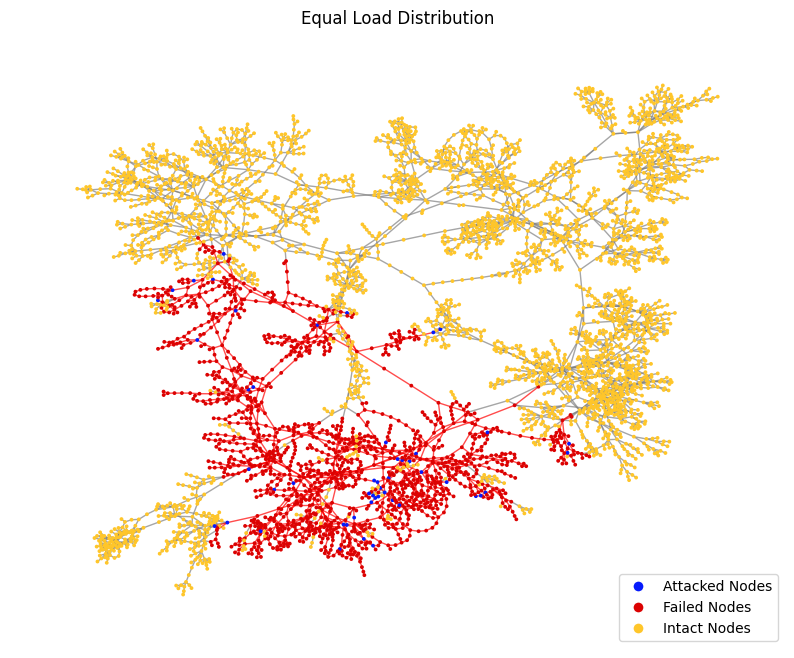

Total failed nodes after sequential attacks: 1519
Attacked nodes: [1769, 1833, 1754, 1828, 1067, 1969, 1603, 1970, 1453, 1116, 1113, 1419, 1410, 2113, 1143, 1249, 1107, 1499, 1832, 1317, 1579, 1105, 1445, 1361, 1060, 1644, 1919, 1626, 4588, 4030, 4534, 4001, 285, 306, 4473, 2240, 4709, 1176, 759, 760, 396, 4616, 1474, 2158, 2771, 3004, 1206, 4719, 2144, 4733]
Graph loaded: 4941 nodes, 6594 edges


In [224]:
fn = [0, 0, 0, 0]

# Proportional Load Distribution 50 nodes attack
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure_with_attacked_nodes(G_after_failure, attacked_nodes, title="Proportional Load Distribution")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")
print("Attacked nodes:", attacked_nodes)
num_failed = sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"])
fn[0] = num_failed

# Equal Load Distribution 50 nodes attack
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_equal_load_distribution(G, attacked_nodes)
draw_graph_after_failure_with_attacked_nodes(G_after_failure, attacked_nodes, title="Equal Load Distribution")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")
print("Attacked nodes:", attacked_nodes)
num_failed = sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"])
fn[1] = num_failed

# Proportional Load Distribution sequential 50 node attacks
G0 = load_data_with_attributes()
G = G0.copy()
failed_nodes = []
attacked_nodes = []
for i in range(50):
    attacked_node = high_load_capacity_ratio_node_attack(G, number_of_nodes=1)
    attacked_nodes.extend(attacked_node)
    G, _, _, _ = cascade_failure_proportional_load_distribution(G, attacked_node)

draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
print(f"Total failed nodes after sequential attacks: {num_failed}")
print("Attacked nodes:", attacked_nodes)
fn[2] = num_failed

G = load_data_with_attributes()

# Equal Load Distribution sequential 50 node attacks
G0 = load_data_with_attributes()
G = G0.copy()
failed_nodes = []
attacked_nodes = []
for i in range(50):
    attacked_node = high_load_capacity_ratio_node_attack(G, number_of_nodes=1)
    attacked_nodes.extend(attacked_node)
    G, _, _, _ = cascade_failure_equal_load_distribution(G, attacked_node)

draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
print(f"Total failed nodes after sequential attacks: {num_failed}")
print("Attacked nodes:", attacked_nodes)
fn[3] = num_failed

G = load_data_with_attributes()

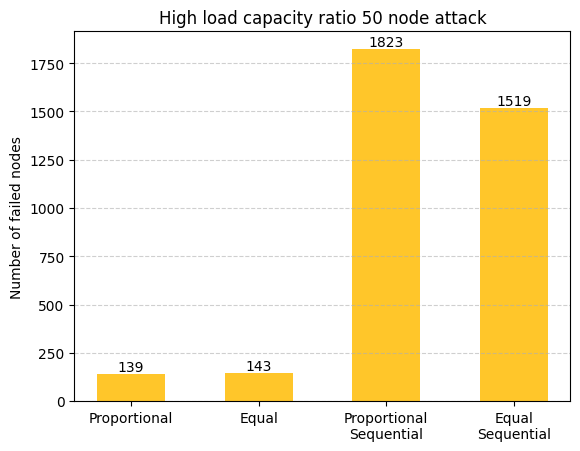

In [225]:
labels = [
    "Proportional",
    "Equal",
    "Proportional\nSequential",
    "Equal\nSequential"
]
x = np.arange(len(labels)) * 1.5

bars = plt.bar(x, fn, color='#ffc62a')

plt.title("High load capacity ratio 50 node attack")
plt.ylabel("Number of failed nodes")
plt.xticks(x, labels)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )

plt.show()


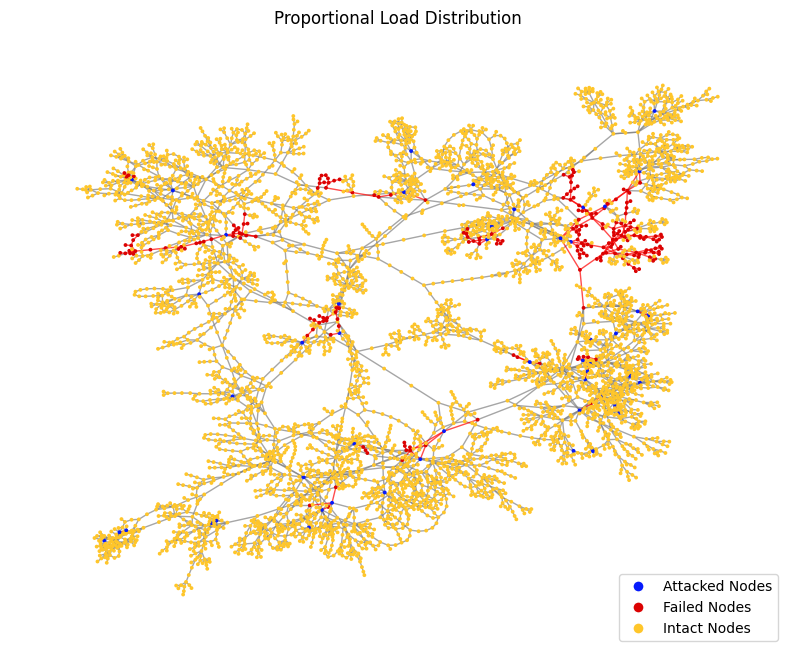

Number of cascade steps: 13
Failed nodes per step: [28, 27, 30, 30, 25, 22, 24, 22, 16, 9, 7, 2, 0]
Final outputs: {'num_failed_nodes': 277, 'num_intact_nodes': 4664, 'size_largest_cc': 4445}
Attacked nodes: [2553, 3468, 1030, 2717, 1166, 2607, 4402, 2221, 2851, 4357, 1170, 2595, 2724, 854, 831, 532, 2561, 2533, 2574, 1243, 2617, 2692, 1224, 1489, 140, 3785, 2959, 386, 681, 4448, 2662, 2545, 280, 2671, 4206, 780, 2282, 1419, 284, 4401, 2409, 4221, 3329, 1313, 4164, 1403, 2813, 1006, 2918, 4686]


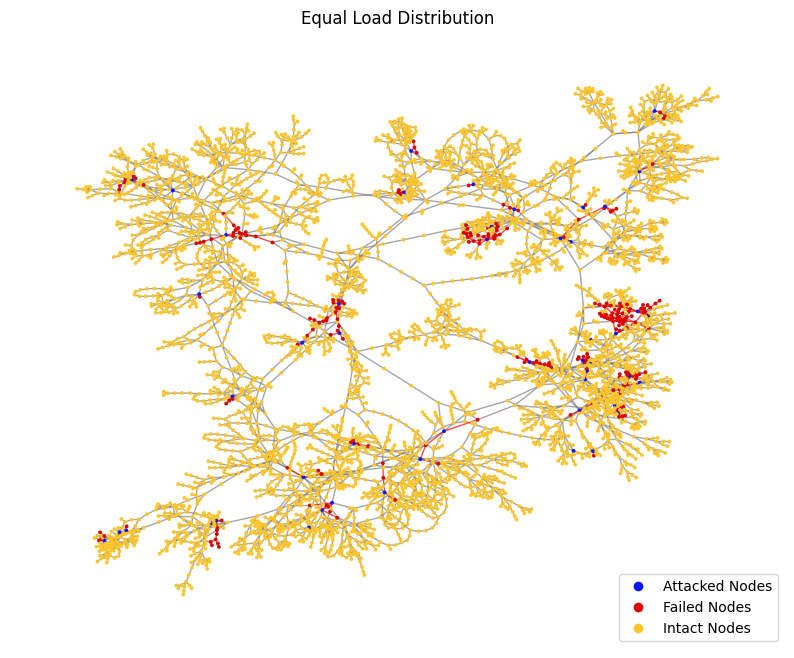

Number of cascade steps: 22
Failed nodes per step: [89, 30, 18, 19, 14, 7, 7, 4, 2, 3, 3, 6, 8, 2, 2, 3, 1, 3, 3, 3, 1, 0]
Final outputs: {'num_failed_nodes': 272, 'num_intact_nodes': 4669, 'size_largest_cc': 4516}
Attacked nodes: [2553, 3468, 1030, 2717, 1166, 2607, 4402, 2221, 2851, 4357, 1170, 2595, 2724, 854, 831, 532, 2561, 2533, 2574, 1243, 2617, 2692, 1224, 1489, 140, 3785, 2959, 386, 681, 4448, 2662, 2545, 280, 2671, 4206, 780, 2282, 1419, 284, 4401, 2409, 4221, 3329, 1313, 4164, 1403, 2813, 1006, 2918, 4686]
Graph loaded: 4941 nodes, 6594 edges


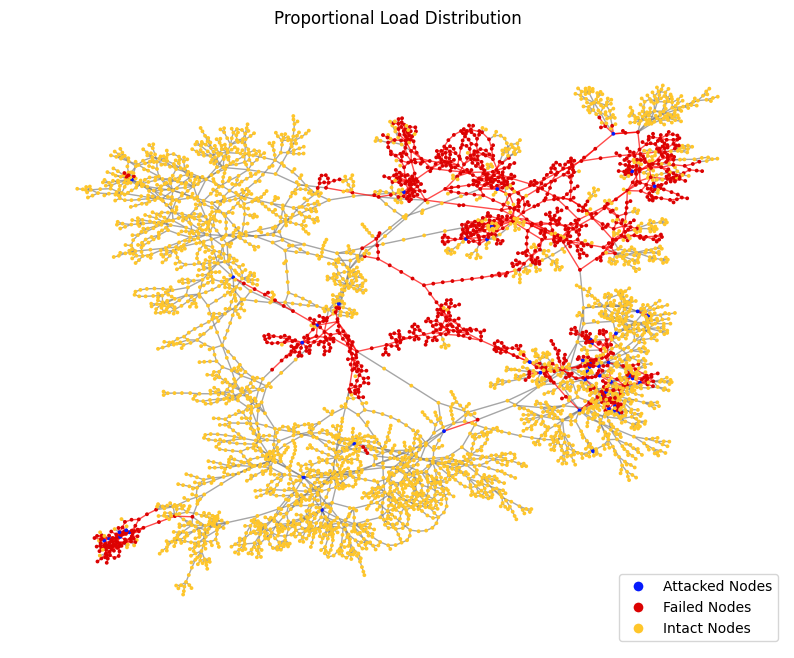

Total failed nodes after sequential attacks: 1271
Attacked nodes: [2553, 3468, 1030, 2717, 1166, 2607, 2959, 2662, 4402, 2221, 2282, 396, 2608, 2851, 4357, 1170, 2819, 2595, 2533, 2554, 2545, 2617, 2813, 2434, 2604, 2724, 854, 831, 846, 3895, 205, 3904, 692, 4401, 2561, 2852, 2574, 2692, 2936, 2687, 2918, 2439, 2908, 2538, 1243, 4352, 4381, 4346, 2249, 1224]
Graph loaded: 4941 nodes, 6594 edges
Graph loaded: 4941 nodes, 6594 edges


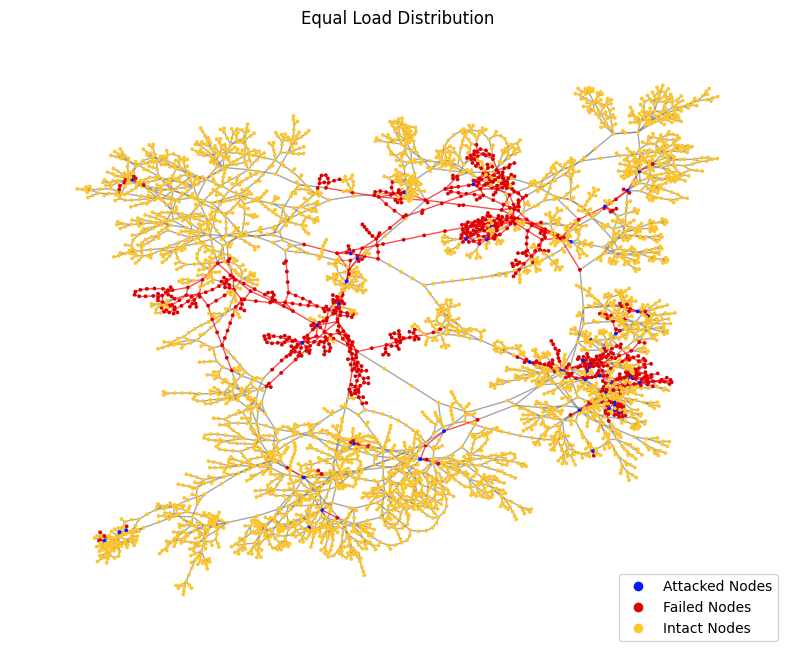

Total failed nodes after sequential attacks: 830
Attacked nodes: [2553, 3468, 1030, 2717, 1166, 2607, 4402, 2221, 2282, 396, 2851, 4357, 1170, 2595, 2533, 2561, 2959, 2724, 2662, 854, 2819, 831, 532, 2383, 2574, 2692, 2936, 846, 140, 4206, 520, 4199, 3785, 1243, 2617, 4401, 2908, 2918, 2608, 2586, 2554, 2813, 2545, 2262, 1224, 1313, 2687, 2846, 2439, 1489]
Graph loaded: 4941 nodes, 6594 edges


In [226]:
fn = [0, 0, 0, 0]

# Proportional Load Distribution 50 nodes attack
attacked_nodes = high_load_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure_with_attacked_nodes(G_after_failure, attacked_nodes, title="Proportional Load Distribution")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")
print("Attacked nodes:", attacked_nodes)
num_failed = sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"])
fn[0] = num_failed

# Equal Load Distribution 50 nodes attack
attacked_nodes = high_load_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_equal_load_distribution(G, attacked_nodes)
draw_graph_after_failure_with_attacked_nodes(G_after_failure, attacked_nodes, title="Equal Load Distribution")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")
print("Attacked nodes:", attacked_nodes)
num_failed = sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"])
fn[1] = num_failed

# Proportional Load Distribution sequential 50 node attacks
G0 = load_data_with_attributes()
G = G0.copy()
failed_nodes = []
attacked_nodes = []
for i in range(50):
    attacked_node = high_load_node_attack(G, number_of_nodes=1)
    attacked_nodes.extend(attacked_node)
    G, _, _, _ = cascade_failure_proportional_load_distribution(G, attacked_node)

draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
print(f"Total failed nodes after sequential attacks: {num_failed}")
print("Attacked nodes:", attacked_nodes)
fn[2] = num_failed

G = load_data_with_attributes()

# Equal Load Distribution sequential 50 node attacks
G0 = load_data_with_attributes()
G = G0.copy()
failed_nodes = []
attacked_nodes = []
for i in range(50):
    attacked_node = high_load_node_attack(G, number_of_nodes=1)
    attacked_nodes.extend(attacked_node)
    G, _, _, _ = cascade_failure_equal_load_distribution(G, attacked_node)

draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
print(f"Total failed nodes after sequential attacks: {num_failed}")
print("Attacked nodes:", attacked_nodes)
fn[3] = num_failed

G = load_data_with_attributes()

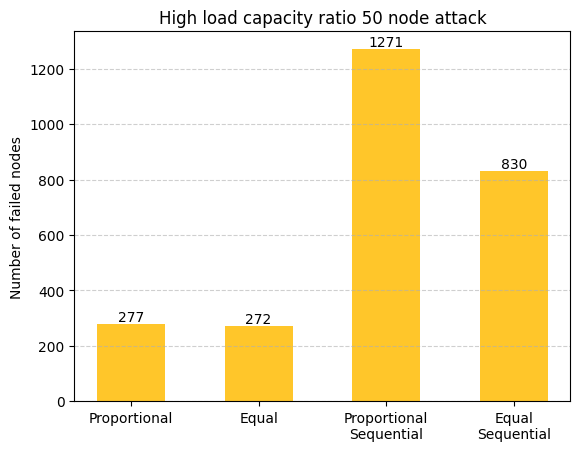

In [227]:
labels = [
    "Proportional",
    "Equal",
    "Proportional\nSequential",
    "Equal\nSequential"
]
x = np.arange(len(labels)) * 1.5

bars = plt.bar(x, fn, color='#ffc62a')

plt.title("High load capacity ratio 50 node attack")
plt.ylabel("Number of failed nodes")
plt.xticks(x, labels)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )

plt.show()


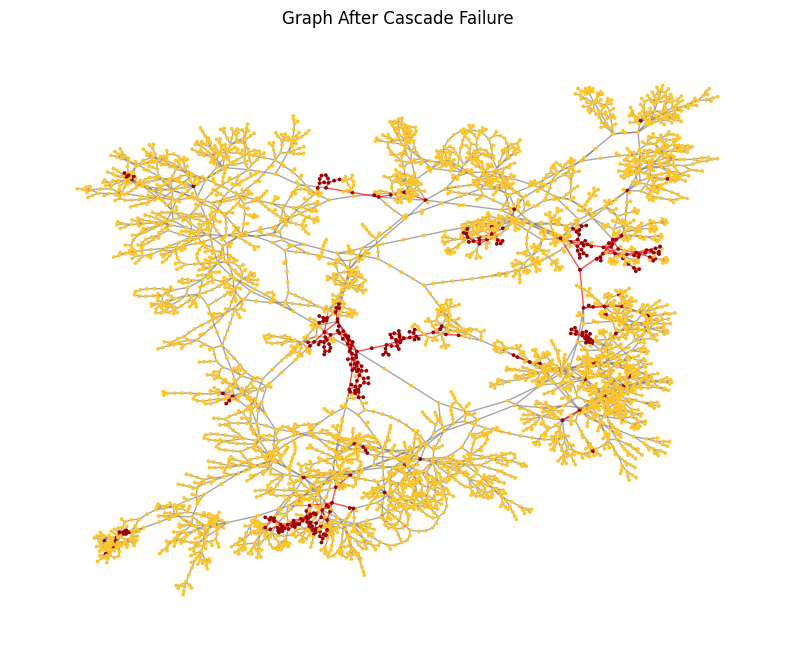

Number of cascade steps: 33
Failed nodes per step: [17, 20, 23, 15, 18, 20, 9, 13, 13, 10, 12, 17, 9, 9, 13, 11, 6, 5, 7, 10, 11, 6, 5, 2, 1, 1, 3, 1, 1, 4, 5, 1, 0]
Final outputs: {'num_failed_nodes': 335, 'num_intact_nodes': 4606, 'size_largest_cc': 4425}


In [228]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")

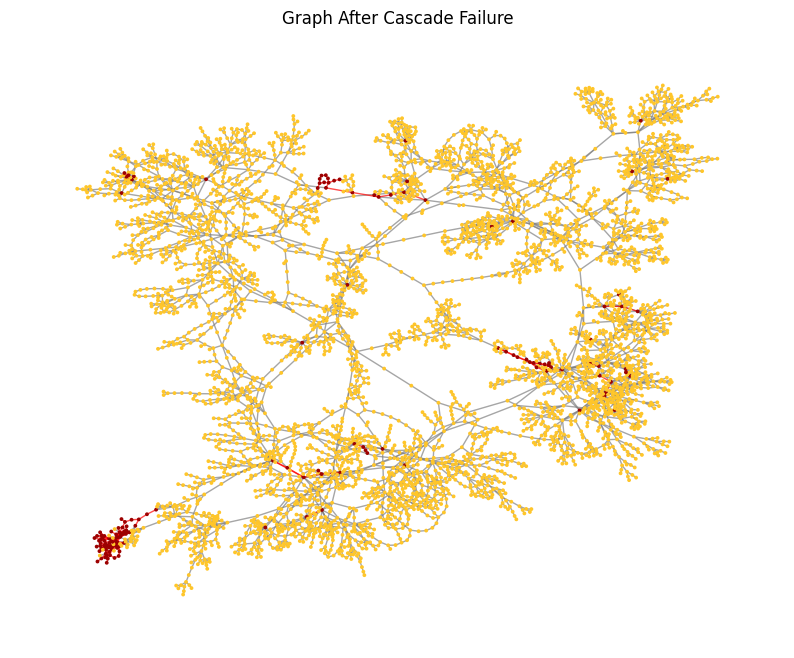

Number of cascade steps: 12
Failed nodes per step: [16, 10, 8, 7, 11, 11, 12, 14, 12, 3, 1, 0]
Final outputs: {'num_failed_nodes': 148, 'num_intact_nodes': 4793, 'size_largest_cc': 4532}


In [229]:
attacked_nodes = high_degree_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")

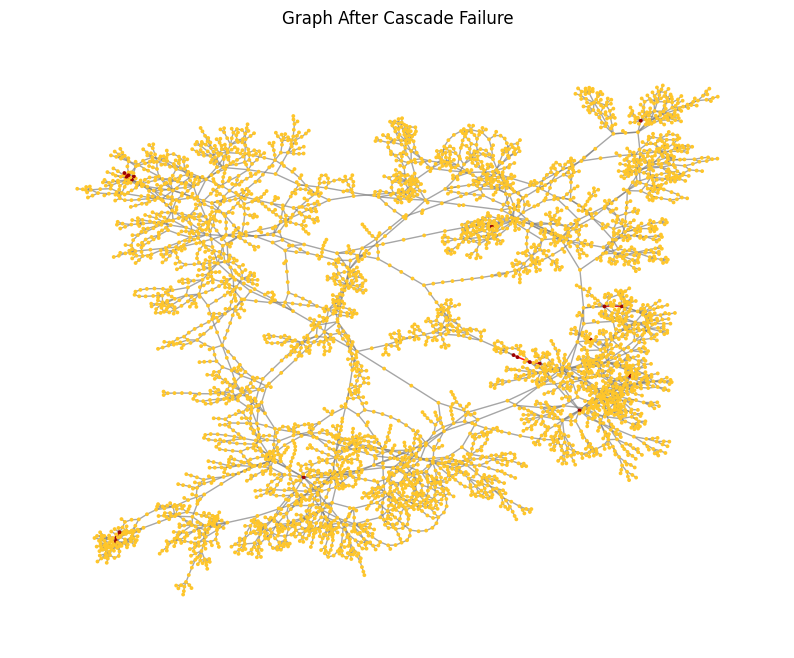

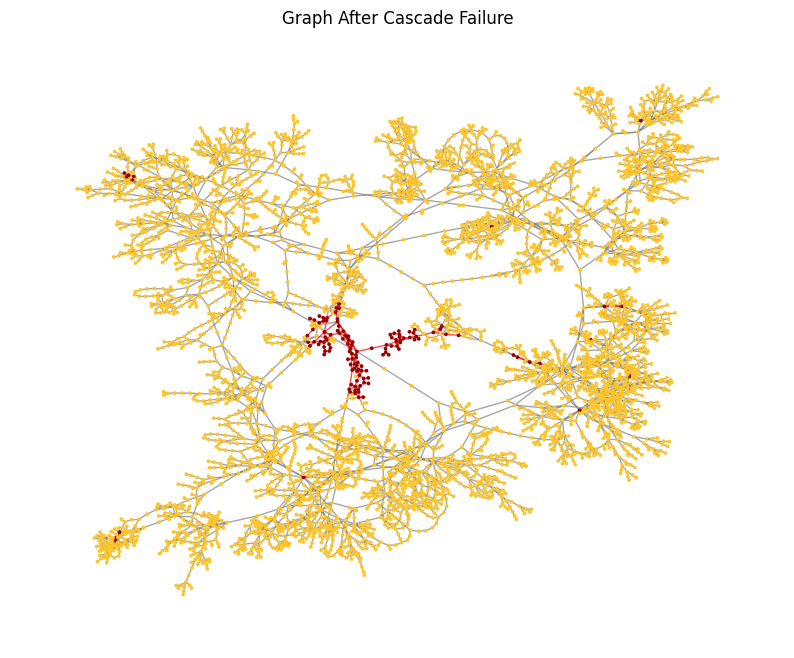

Critical node whose failure causes significant cascade: 384


In [230]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=13)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_47 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=14)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_48 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

node = None
for n in failed_nodes_48:
    if n not in failed_nodes_47:
        node=n
        break
print("Critical node whose failure causes significant cascade:", node)

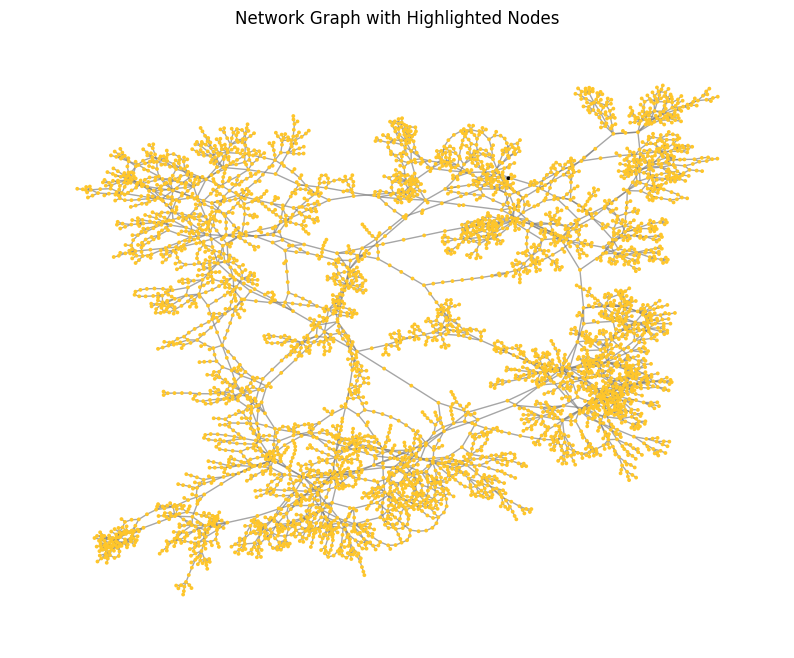

In [231]:
draw_graph_with_node_highlighted(G, [8])

Load of node 8: 20.885424887303657
Capacity of node 8: 36.60728621977991
Degree of node 8: 3


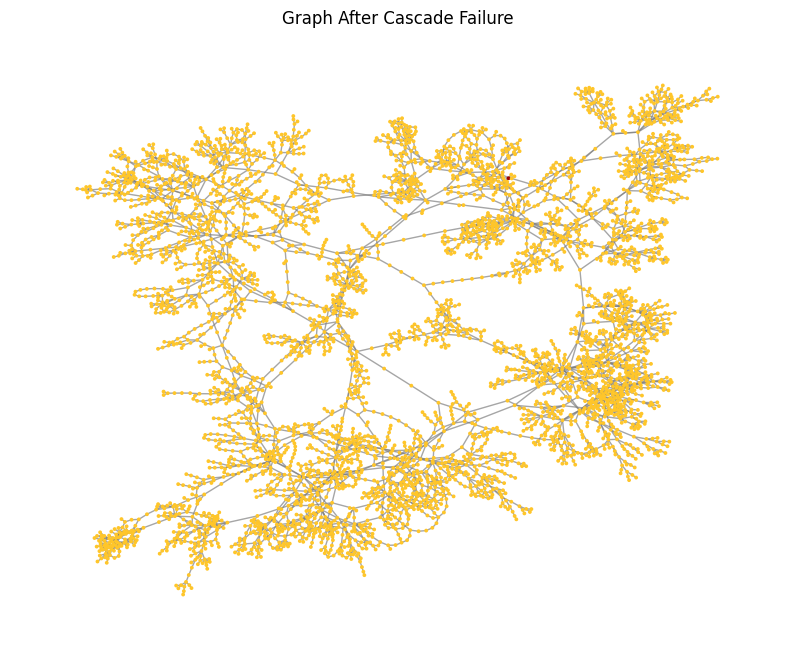

In [232]:
attacked_nodes = [8]
degree_of_node_8 = G.degree(8)
capacity_of_node_8 = G.nodes[8]['capacity']
load_of_node_8 = G.nodes[8]['load']
print("Load of node 8:", load_of_node_8)
print("Capacity of node 8:", capacity_of_node_8)
print("Degree of node 8:", degree_of_node_8)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
